# Import Libraries and useful dependencies

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display
import warnings
warnings.filterwarnings('ignore')


In [3]:
pd.set_option('display.notebook_repr_html',True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


# Reading in and prepocessing Data

In [4]:
#Go up one step into the Datasets folder and read in the csv files sepcified
gdp = pd.read_csv('./Datasets/World_GDP.csv')
population = pd.read_csv('./Datasets/World_population.csv')
military_exp = pd.read_csv('./Datasets/World_Military_Spending.csv')

In [5]:
#Display first the 5 rows of data
gdp.head()
population.head()
military_exp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Military expenditure (current USD),MS.MIL.XPND.CD,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,Afghanistan,AFG,Military expenditure (current USD),MS.MIL.XPND.CD,nan,nan,nan,nan,nan,nan,...,298146852.50,325807003.70,238583385.40,217194107.10,268227074.20,199518614.80,185878310.10,191407113.20,198086263.30,nan
2,Angola,AGO,Military expenditure (current USD),MS.MIL.XPND.CD,nan,nan,nan,nan,nan,nan,...,3500794836.00,3639496374.00,4144634851.00,6090751702.00,6841864484.00,3608299115.00,2764054937.00,3062872914.00,1983613748.00,nan
3,Albania,ALB,Military expenditure (current USD),MS.MIL.XPND.CD,nan,nan,nan,nan,nan,nan,...,185893242.00,197006789.20,183204695.70,180015508.80,178120368.00,132350667.60,130853162.60,144382688.70,180488725.10,nan
4,Andorra,AND,Military expenditure (current USD),MS.MIL.XPND.CD,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [6]:
#Delete unnecessary columns
del gdp['Indicator Name'], gdp['Indicator Code']
del population['Indicator Name'], population['Indicator Code']
del military_exp['Indicator Name'], military_exp['Indicator Code']

In [7]:
# Return all the rows, Columns Country Name and Country Code and the last 6 years only
gdp = gdp.loc[:, ['Country Name','Country Code','2013','2014','2015','2016','2017','2018']]

population = population.loc[:, ['Country Name','Country Code','2013','2014',\
                                             '2015', '2016', '2017', '2018']]

military_exp = military_exp.loc[:, ['Country Name','Country Code','2013','2014','2015','2016', \
                                                 '2017','2018']]
military_exp.head()

,Country Name,Country Code,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,nan,nan,nan,nan,nan,nan
1,Afghanistan,AFG,217194107.10,268227074.20,199518614.80,185878310.10,191407113.20,198086263.30
2,Angola,AGO,6090751702.00,6841864484.00,3608299115.00,2764054937.00,3062872914.00,1983613748.00
3,Albania,ALB,180015508.80,178120368.00,132350667.60,130853162.60,144382688.70,180488725.10
4,Andorra,AND,nan,nan,nan,nan,nan,nan


In [8]:
# Use a logic test/ conditional statement to return only the 10 countries we want to work with
preferred_countries = ['AUS','CHN','DEU','FRA','ITA','RUS','SAU','USA','GBR','KOR']

gdp = gdp[gdp['Country Code'].isin(preferred_countries)]

population = population[population['Country Code'].isin(preferred_countries)]

military_exp = military_exp[military_exp['Country Code'].isin(preferred_countries)]
military_exp.head

<bound method NDFrame.head of            Country Name Country Code            2013            2014  \
11            Australia          AUS  24825262589.00  25783708714.00   
38                China          CHN 180000000000.00 201000000000.00   
53              Germany          DEU  45930540563.00  46102673010.00   
75               France          FRA  62417099178.00  63613569143.00   
79       United Kingdom          GBR  56861759588.00  59182858554.00   
114               Italy          ITA  29957445905.00  27701034335.00   
124            Korea S.          KOR  34311220715.00  37552328673.00   
200  Russian Federation          RUS  88352896464.00  84696504653.00   
203        Saudi Arabia          SAU  67020000000.00  80762400000.00   
249       United States          USA 640000000000.00 610000000000.00   

               2015            2016            2017            2018  
11   24045569111.00  26382947050.00  27691112417.00  26711834225.00  
38  214000000000.00 216000000000.00 2

In [9]:
#Rename columns to avoid ambiguous columns after merging data 
gdp = gdp.rename(columns={"2013": "2013_gdp",
                          "2014": "2014_gdp",
                          "2015": "2015_gdp",
                          "2016": "2016_gdp",
                          "2017": "2017_gdp",
                          "2018": "2018_gdp"})

population = population.rename(columns={"2013" :"2013_pop",
                                        "2014": "2014_pop",
                                       "2015": "2015_pop",
                                       "2016": "2016_pop",
                                       "2017": "2017_pop",
                                       "2018": "2018_pop"})

military_exp = military_exp.rename(columns={"2013":"2013_mil",
                                            "2014":"2014_mil",
                                           "2015":"2015_mil",
                                           "2016":"2016_mil",
                                           "2017":"2017_mil",
                                           "2018":"2018_mil"})
military_exp



,Country Name,Country Code,2013_mil,2014_mil,2015_mil,2016_mil,2017_mil,2018_mil
11,Australia,AUS,24825262589.00,25783708714.00,24045569111.00,26382947050.00,27691112417.00,26711834225.00
38,China,CHN,180000000000.00,201000000000.00,214000000000.00,216000000000.00,228000000000.00,250000000000.00
53,Germany,DEU,45930540563.00,46102673010.00,39812576245.00,41579494874.00,45381722042.00,49470627811.00
75,France,FRA,62417099178.00,63613569143.00,55342131529.00,57358414419.00,60417498822.00,63799676593.00
79,United Kingdom,GBR,56861759588.00,59182858554.00,53862185493.00,48118943518.00,46433303401.00,49997192521.00
114,Italy,ITA,29957445905.00,27701034335.00,22180845070.00,25033027895.00,26447892915.00,27807513898.00
124,Korea S.,KOR,34311220715.00,37552328673.00,36570769323.00,36885283430.00,39170682136.00,43069973343.00
200,Russian Federation,RUS,88352896464.00,84696504653.00,66418708184.00,69245309461.00,66527303992.00,61387546980.00
203,Saudi Arabia,SAU,67020000000.00,80762400000.00,87185866667.00,63672800000.00,70400000000.00,67554666667.00
249,United States,USA,640000000000.00,610000000000.00,596000000000.00,600000000000.00,606000000000.00,649000000000.00


In [10]:
# Use a sql like inner join to join data, preserving the order of the left keys
data = pd.merge(population, gdp, how="inner", on=['Country Name','Country Code'])
data = pd.merge(data, military_exp, how='inner', on=['Country Name', 'Country Code'])

#print(data.head(10))
data.head(10)

,Country Name,Country Code,2013_pop,2014_pop,2015_pop,2016_pop,2017_pop,2018_pop,2013_gdp,2014_gdp,2015_gdp,2016_gdp,2017_gdp,2018_gdp,2013_mil,2014_mil,2015_mil,2016_mil,2017_mil,2018_mil
0,Australia,AUS,23128129.00,23475686.00,23815995.00,24190907.00,24601860.00,24982688.00,1580000000000.00,1470000000000.00,1350000000000.00,1210000000000.00,1330000000000.00,1430000000000.00,24825262589.00,25783708714.00,24045569111.00,26382947050.00,27691112417.00,26711834225.00
1,China,CHN,1357380000.00,1364270000.00,1371220000.00,1378665000.00,1386395000.00,1392730000.00,9570000000000.00,10500000000000.00,11100000000000.00,11200000000000.00,12300000000000.00,13900000000000.00,180000000000.00,201000000000.00,214000000000.00,216000000000.00,228000000000.00,250000000000.00
2,Germany,DEU,80645605.00,80982500.00,81686611.00,82348669.00,82657002.00,82905782.00,3730000000000.00,3880000000000.00,3360000000000.00,3470000000000.00,3670000000000.00,3950000000000.00,45930540563.00,46102673010.00,39812576245.00,41579494874.00,45381722042.00,49470627811.00
3,France,FRA,65998687.00,66312067.00,66548272.00,66724104.00,66864379.00,66965912.00,2810000000000.00,2850000000000.00,2440000000000.00,2470000000000.00,2600000000000.00,2790000000000.00,62417099178.00,63613569143.00,55342131529.00,57358414419.00,60417498822.00,63799676593.00
4,United Kingdom,GBR,64128273.00,64602298.00,65116219.00,65611593.00,66058859.00,66460344.00,2790000000000.00,3060000000000.00,2930000000000.00,2690000000000.00,2670000000000.00,2860000000000.00,56861759588.00,59182858554.00,53862185493.00,48118943518.00,46433303401.00,49997192521.00
5,Italy,ITA,60233948.00,60789140.00,60730582.00,60627498.00,60536709.00,60421760.00,2140000000000.00,2160000000000.00,1840000000000.00,1880000000000.00,1960000000000.00,2090000000000.00,29957445905.00,27701034335.00,22180845070.00,25033027895.00,26447892915.00,27807513898.00
6,Korea S.,KOR,50428893.00,50746659.00,51014947.00,51217803.00,51361911.00,51606633.00,1370000000000.00,1480000000000.00,1470000000000.00,1500000000000.00,1620000000000.00,1720000000000.00,34311220715.00,37552328673.00,36570769323.00,36885283430.00,39170682136.00,43069973343.00
7,Russian Federation,RUS,143506995.00,143819666.00,144096870.00,144342396.00,144496740.00,144477860.00,2290000000000.00,2060000000000.00,1360000000000.00,1280000000000.00,1570000000000.00,1670000000000.00,88352896464.00,84696504653.00,66418708184.00,69245309461.00,66527303992.00,61387546980.00
8,Saudi Arabia,SAU,30052518.00,30916994.00,31717667.00,32442572.00,33099147.00,33699947.00,747000000000.00,756000000000.00,654000000000.00,645000000000.00,689000000000.00,787000000000.00,67020000000.00,80762400000.00,87185866667.00,63672800000.00,70400000000.00,67554666667.00
9,United States,USA,315993715.00,318301008.00,320635163.00,322941311.00,324985539.00,326687501.00,16800000000000.00,17500000000000.00,18200000000000.00,18700000000000.00,19500000000000.00,20500000000000.00,640000000000.00,610000000000.00,596000000000.00,600000000000.00,606000000000.00,649000000000.00


#  Creating and adding new columns for our analysis

# Analysis 

In [11]:
#Replace Russian Federation with Russia
data = data.replace({'Russian Federation': 'Russia'})
data.head(10)

,Country Name,Country Code,2013_pop,2014_pop,2015_pop,2016_pop,2017_pop,2018_pop,2013_gdp,2014_gdp,2015_gdp,2016_gdp,2017_gdp,2018_gdp,2013_mil,2014_mil,2015_mil,2016_mil,2017_mil,2018_mil
0,Australia,AUS,23128129.00,23475686.00,23815995.00,24190907.00,24601860.00,24982688.00,1580000000000.00,1470000000000.00,1350000000000.00,1210000000000.00,1330000000000.00,1430000000000.00,24825262589.00,25783708714.00,24045569111.00,26382947050.00,27691112417.00,26711834225.00
1,China,CHN,1357380000.00,1364270000.00,1371220000.00,1378665000.00,1386395000.00,1392730000.00,9570000000000.00,10500000000000.00,11100000000000.00,11200000000000.00,12300000000000.00,13900000000000.00,180000000000.00,201000000000.00,214000000000.00,216000000000.00,228000000000.00,250000000000.00
2,Germany,DEU,80645605.00,80982500.00,81686611.00,82348669.00,82657002.00,82905782.00,3730000000000.00,3880000000000.00,3360000000000.00,3470000000000.00,3670000000000.00,3950000000000.00,45930540563.00,46102673010.00,39812576245.00,41579494874.00,45381722042.00,49470627811.00
3,France,FRA,65998687.00,66312067.00,66548272.00,66724104.00,66864379.00,66965912.00,2810000000000.00,2850000000000.00,2440000000000.00,2470000000000.00,2600000000000.00,2790000000000.00,62417099178.00,63613569143.00,55342131529.00,57358414419.00,60417498822.00,63799676593.00
4,United Kingdom,GBR,64128273.00,64602298.00,65116219.00,65611593.00,66058859.00,66460344.00,2790000000000.00,3060000000000.00,2930000000000.00,2690000000000.00,2670000000000.00,2860000000000.00,56861759588.00,59182858554.00,53862185493.00,48118943518.00,46433303401.00,49997192521.00
5,Italy,ITA,60233948.00,60789140.00,60730582.00,60627498.00,60536709.00,60421760.00,2140000000000.00,2160000000000.00,1840000000000.00,1880000000000.00,1960000000000.00,2090000000000.00,29957445905.00,27701034335.00,22180845070.00,25033027895.00,26447892915.00,27807513898.00
6,Korea S.,KOR,50428893.00,50746659.00,51014947.00,51217803.00,51361911.00,51606633.00,1370000000000.00,1480000000000.00,1470000000000.00,1500000000000.00,1620000000000.00,1720000000000.00,34311220715.00,37552328673.00,36570769323.00,36885283430.00,39170682136.00,43069973343.00
7,Russia,RUS,143506995.00,143819666.00,144096870.00,144342396.00,144496740.00,144477860.00,2290000000000.00,2060000000000.00,1360000000000.00,1280000000000.00,1570000000000.00,1670000000000.00,88352896464.00,84696504653.00,66418708184.00,69245309461.00,66527303992.00,61387546980.00
8,Saudi Arabia,SAU,30052518.00,30916994.00,31717667.00,32442572.00,33099147.00,33699947.00,747000000000.00,756000000000.00,654000000000.00,645000000000.00,689000000000.00,787000000000.00,67020000000.00,80762400000.00,87185866667.00,63672800000.00,70400000000.00,67554666667.00
9,United States,USA,315993715.00,318301008.00,320635163.00,322941311.00,324985539.00,326687501.00,16800000000000.00,17500000000000.00,18200000000000.00,18700000000000.00,19500000000000.00,20500000000000.00,640000000000.00,610000000000.00,596000000000.00,600000000000.00,606000000000.00,649000000000.00


In [12]:
colors = ['gray','yellow','red','teal','blue','hotpink', 'green','purple','orange','lime']

data['Colors']= colors

data.head(10)

,Country Name,Country Code,2013_pop,2014_pop,2015_pop,2016_pop,2017_pop,2018_pop,2013_gdp,2014_gdp,...,2016_gdp,2017_gdp,2018_gdp,2013_mil,2014_mil,2015_mil,2016_mil,2017_mil,2018_mil,Colors
0,Australia,AUS,23128129.00,23475686.00,23815995.00,24190907.00,24601860.00,24982688.00,1580000000000.00,1470000000000.00,...,1210000000000.00,1330000000000.00,1430000000000.00,24825262589.00,25783708714.00,24045569111.00,26382947050.00,27691112417.00,26711834225.00,gray
1,China,CHN,1357380000.00,1364270000.00,1371220000.00,1378665000.00,1386395000.00,1392730000.00,9570000000000.00,10500000000000.00,...,11200000000000.00,12300000000000.00,13900000000000.00,180000000000.00,201000000000.00,214000000000.00,216000000000.00,228000000000.00,250000000000.00,yellow
2,Germany,DEU,80645605.00,80982500.00,81686611.00,82348669.00,82657002.00,82905782.00,3730000000000.00,3880000000000.00,...,3470000000000.00,3670000000000.00,3950000000000.00,45930540563.00,46102673010.00,39812576245.00,41579494874.00,45381722042.00,49470627811.00,red
3,France,FRA,65998687.00,66312067.00,66548272.00,66724104.00,66864379.00,66965912.00,2810000000000.00,2850000000000.00,...,2470000000000.00,2600000000000.00,2790000000000.00,62417099178.00,63613569143.00,55342131529.00,57358414419.00,60417498822.00,63799676593.00,teal
4,United Kingdom,GBR,64128273.00,64602298.00,65116219.00,65611593.00,66058859.00,66460344.00,2790000000000.00,3060000000000.00,...,2690000000000.00,2670000000000.00,2860000000000.00,56861759588.00,59182858554.00,53862185493.00,48118943518.00,46433303401.00,49997192521.00,blue
5,Italy,ITA,60233948.00,60789140.00,60730582.00,60627498.00,60536709.00,60421760.00,2140000000000.00,2160000000000.00,...,1880000000000.00,1960000000000.00,2090000000000.00,29957445905.00,27701034335.00,22180845070.00,25033027895.00,26447892915.00,27807513898.00,hotpink
6,Korea S.,KOR,50428893.00,50746659.00,51014947.00,51217803.00,51361911.00,51606633.00,1370000000000.00,1480000000000.00,...,1500000000000.00,1620000000000.00,1720000000000.00,34311220715.00,37552328673.00,36570769323.00,36885283430.00,39170682136.00,43069973343.00,green
7,Russia,RUS,143506995.00,143819666.00,144096870.00,144342396.00,144496740.00,144477860.00,2290000000000.00,2060000000000.00,...,1280000000000.00,1570000000000.00,1670000000000.00,88352896464.00,84696504653.00,66418708184.00,69245309461.00,66527303992.00,61387546980.00,purple
8,Saudi Arabia,SAU,30052518.00,30916994.00,31717667.00,32442572.00,33099147.00,33699947.00,747000000000.00,756000000000.00,...,645000000000.00,689000000000.00,787000000000.00,67020000000.00,80762400000.00,87185866667.00,63672800000.00,70400000000.00,67554666667.00,orange
9,United States,USA,315993715.00,318301008.00,320635163.00,322941311.00,324985539.00,326687501.00,16800000000000.00,17500000000000.00,...,18700000000000.00,19500000000000.00,20500000000000.00,640000000000.00,610000000000.00,596000000000.00,600000000000.00,606000000000.00,649000000000.00,lime


<IPython.core.display.Javascript object>


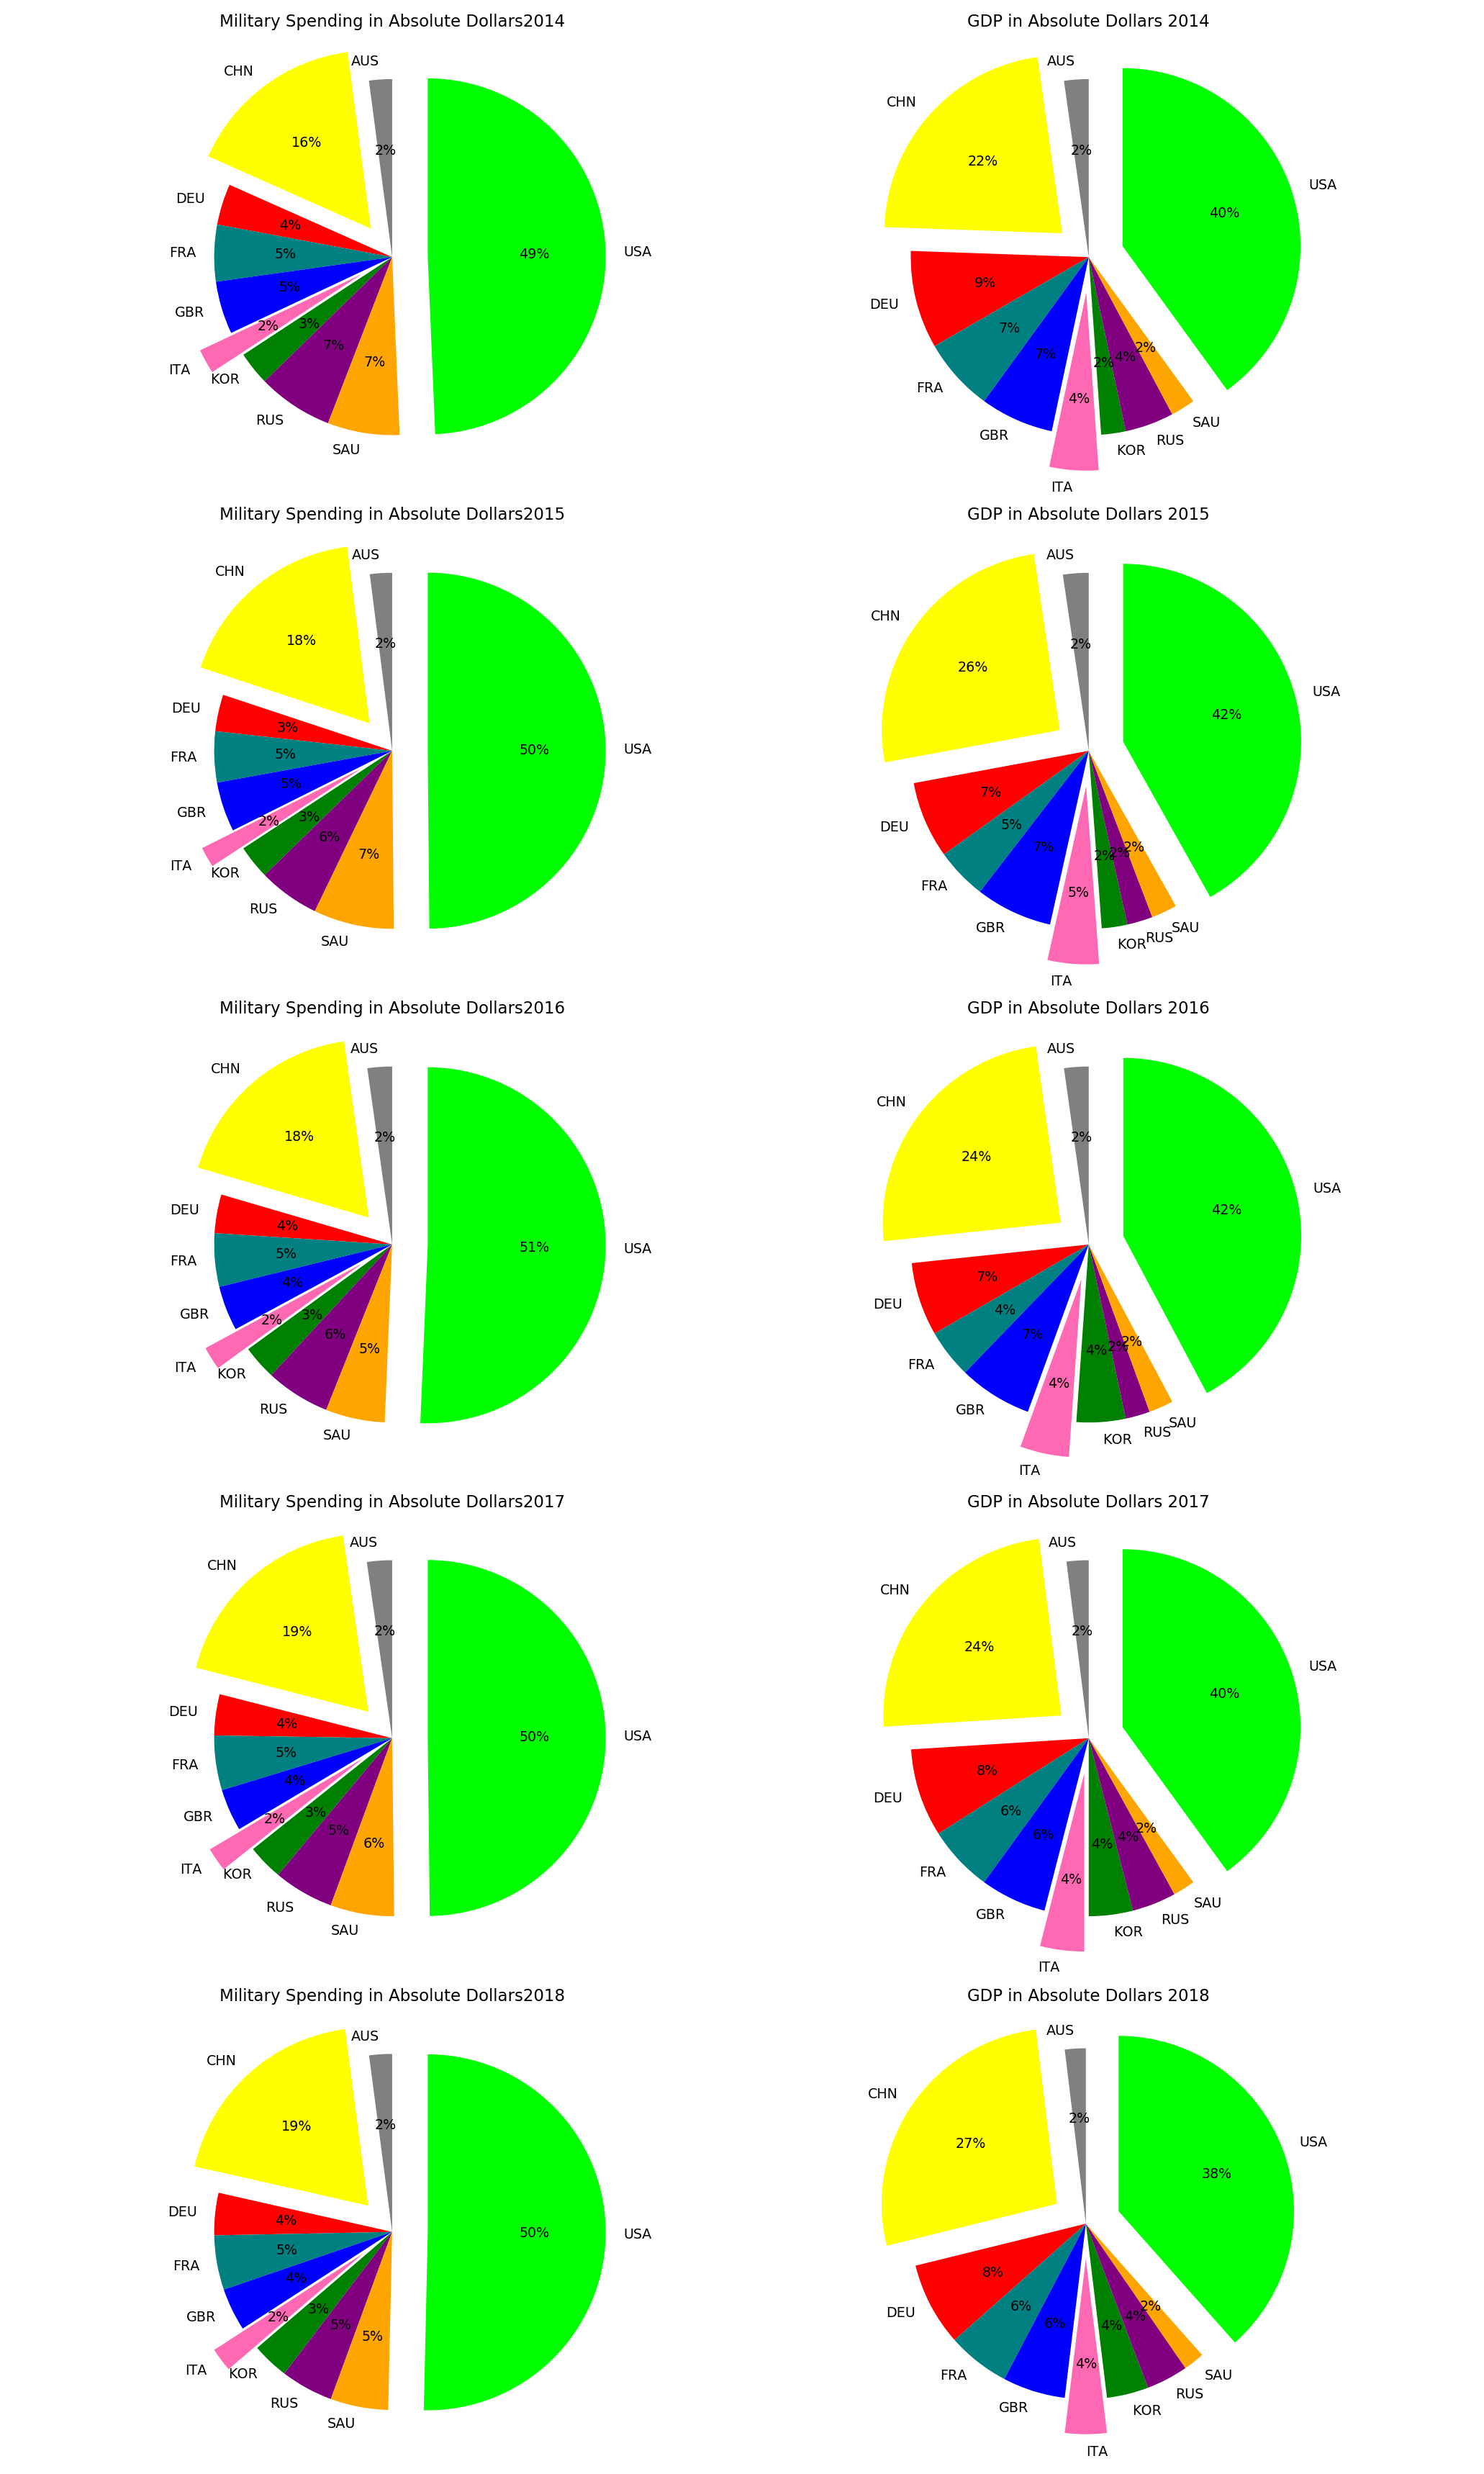

In [13]:
# Create a pie chart to visualize the countries by military spending in absolute dollars and % of gdp

figure, axes = plt.subplots(nrows=5, ncols= 2, figsize=(15,25))

for i in range(5):
    yr = i + 2014
    military = str(yr) + "_mil"
    gdp = str(yr) + "_gdp"
    pop = str(yr) + "_pop"
    
    
    #Format military figures into human readable numbers , calculate military spending in percentage
    plots_df = data[['Country Code','Colors', military, gdp, pop]]
    plots_df['mil_absolute'] = round(plots_df[military] / 1000000000, 1)
    plots_df['gdp_absolute'] = round(plots_df[gdp] / 1000000000000)
    
    labels = plots_df['Country Code'] 
    explode = (0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2)
    
    
    
    axes[i,0].pie(plots_df['mil_absolute'], autopct='%1.0f%%', explode=explode, colors=colors, labels=labels, startangle=90)
    axes[i,0].set_title("Military Spending in Absolute Dollars" + str(yr))

    axes[i,1].pie(plots_df['gdp_absolute'], autopct='%1.0f%%', explode=explode, colors=colors, labels=labels, startangle=90)
    axes[i,1].set_title('GDP in Absolute Dollars ' +str(yr))   
    
    plt.axis('equal')
    
    plt.subplots_adjust( bottom=0.1,  right=0.9, top=0.95, wspace=0.2, hspace=0.2)
    
    plt.tight_layout()
    
    plt.show()
    

In [14]:
plt.savefig('./Images/MilitarySpending.jpg')
plt.show()

# Military Spending in Absolute Dollars vs Percentage of GDP 

<IPython.core.display.Javascript object>


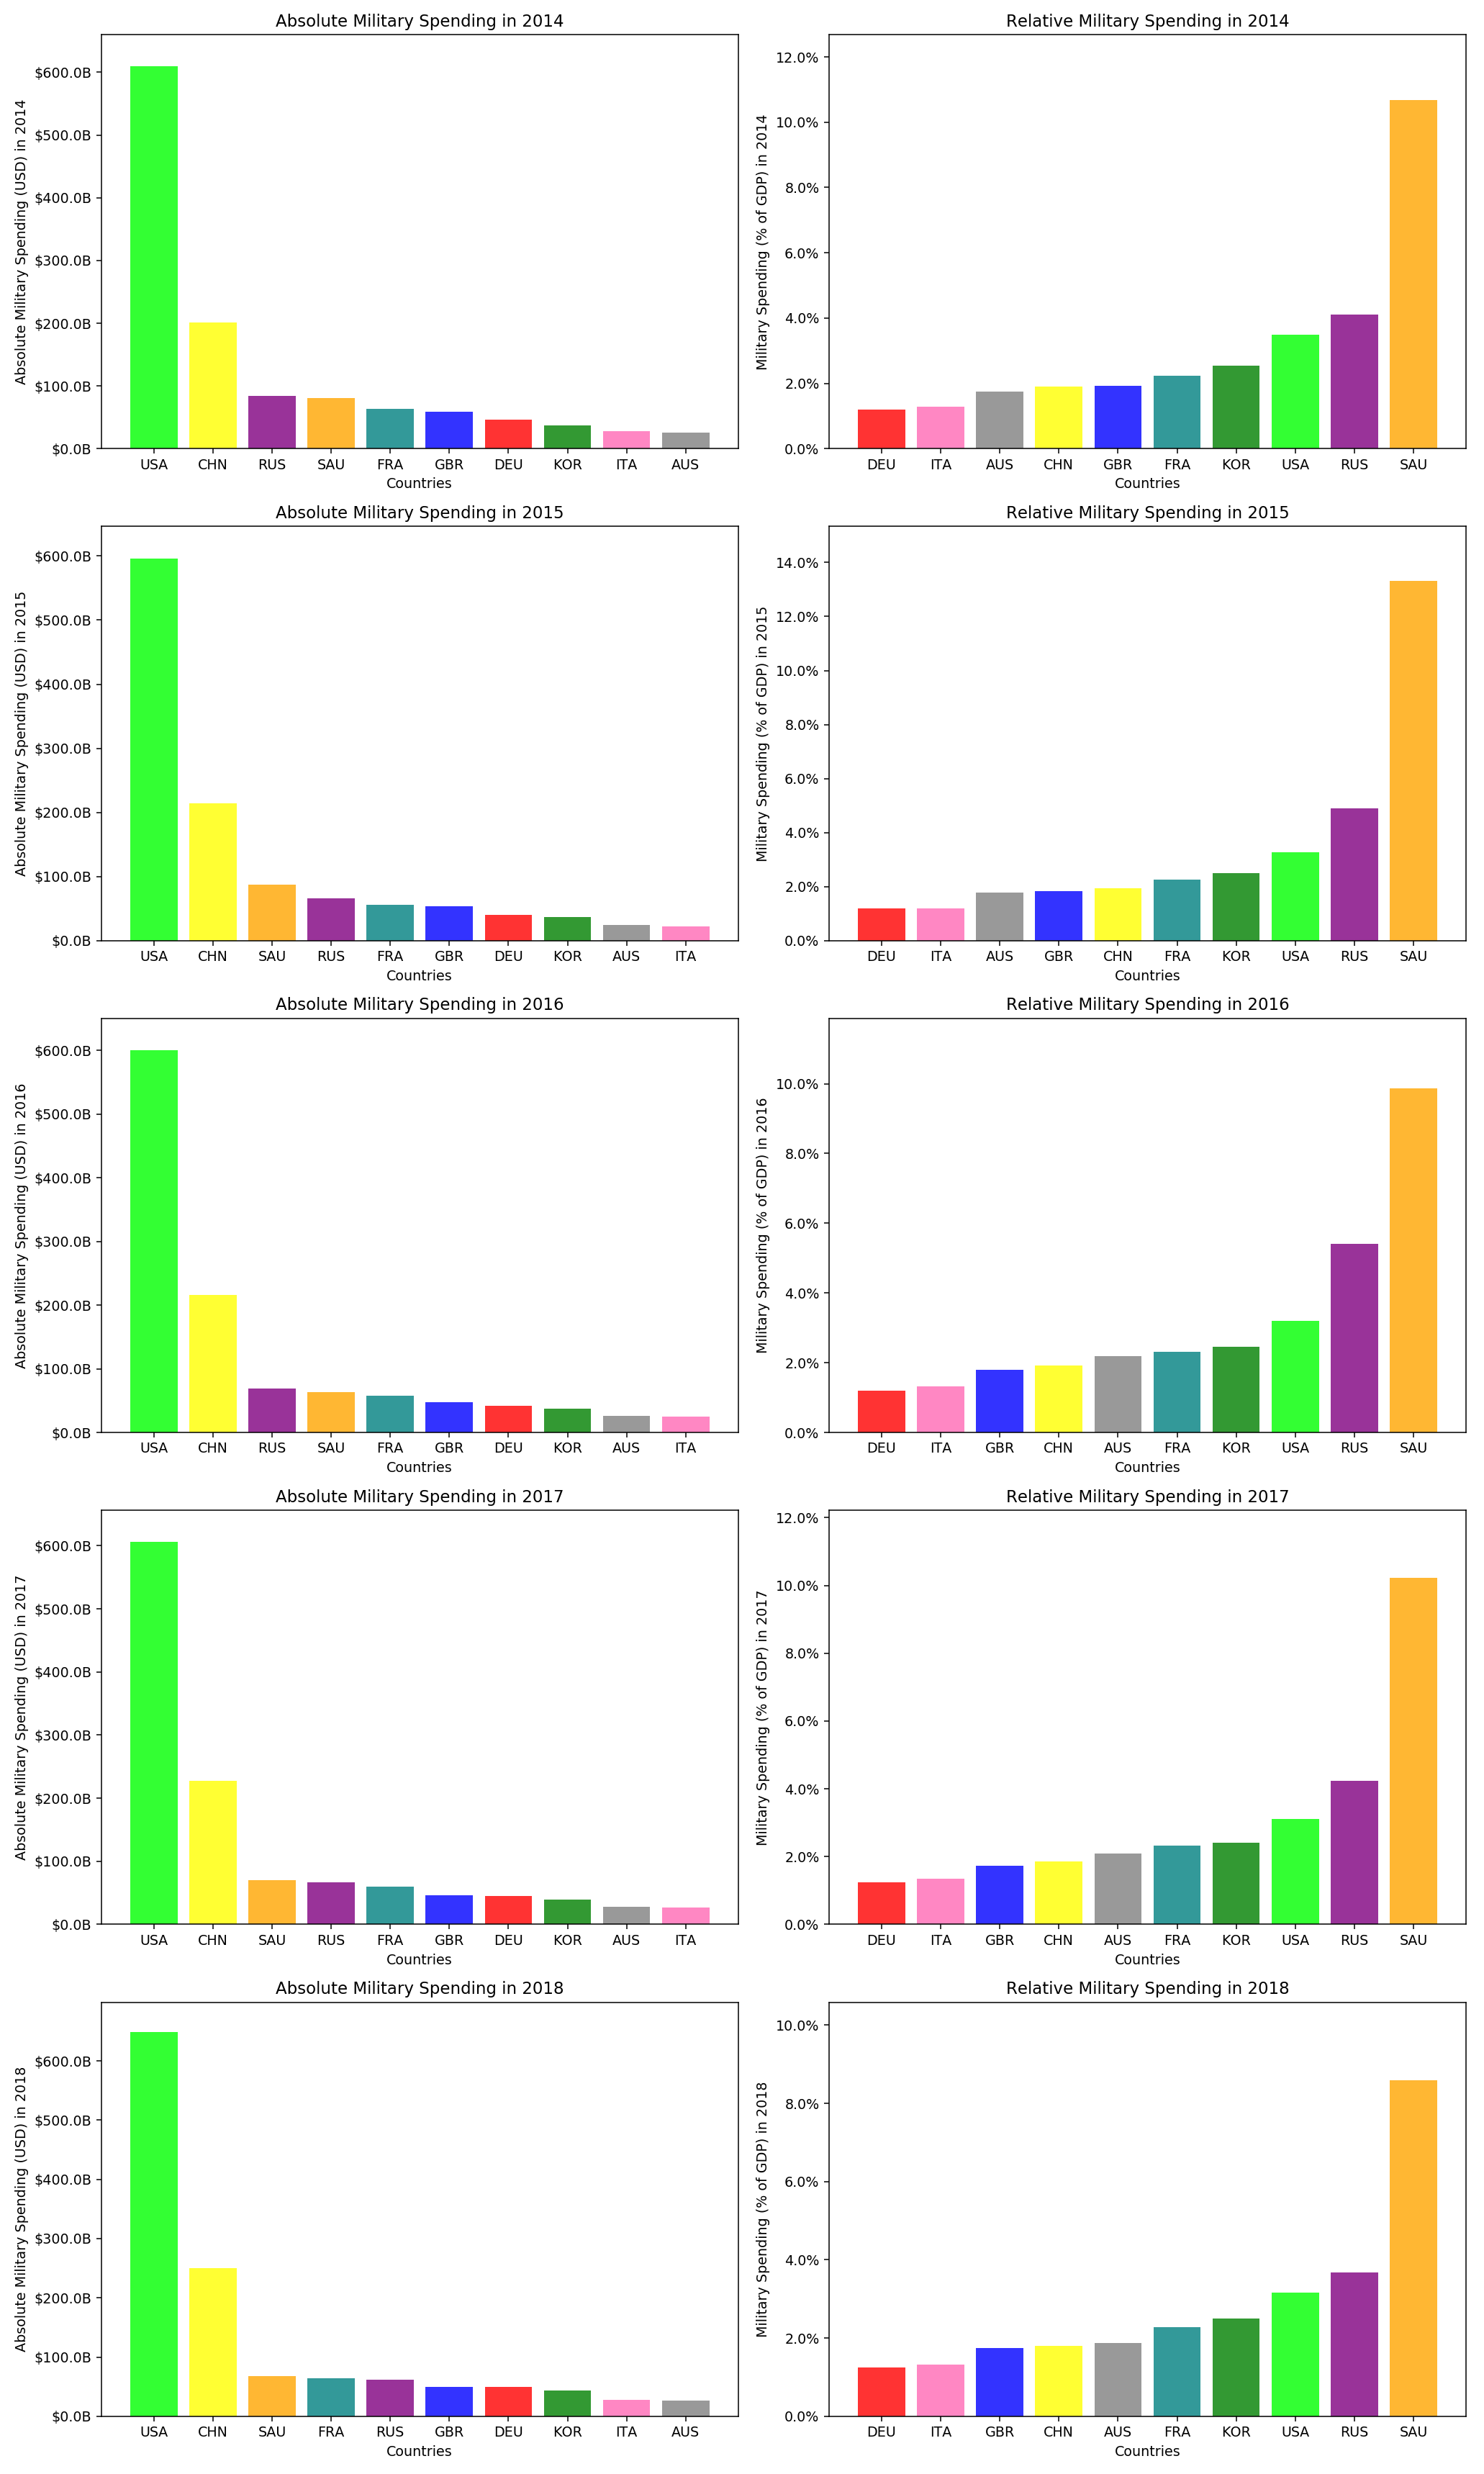

In [15]:
#Create subplots with 5 rows and 2 columns comparing gdp to military spending
import matplotlib.ticker as ticker

figure, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,25))

#Loop through the years and give me population, military spending and gdp 
for i in range(5):
    yr = i + 2014
    military = str(yr) + "_mil"
    gdp = str(yr) + "_gdp"
    pop = str(yr) + "_pop"
    
    
    #Format military figures into human readable numbers , calculate military spending in percentage
    plot = data[['Country Code','Colors', military, gdp, pop]]
    plot['mil_absolute'] = plot[military] / 1000000000
    plot['mil_percent'] = (plot[military] / plot[gdp]) * 100
    plot1 = plot.sort_values('mil_absolute', ascending=False).copy()
    plot2 = plot.sort_values('mil_percent')

    #Graph styling, ticks and labels
    colors= plot1['Colors']
    colors2= plot2['Colors']
    labels = plot1['Country Code']
    labels2 = plot2['Country Code']
    x_axis = np.arange(len(labels))
    tick_locations = [value for value in x_axis]
    
    #Absolute military spending by country year over year
    axes[i, 0].bar('Country Code','mil_absolute', data = plot1, color=colors, align='center', alpha=0.8, label= labels)
    
    # Customize axes labels and tick locations
    axes[i, 0].set_xlabel('Countries')
    axes[i, 0].set_ylabel('Absolute Military Spending (USD) in '+ str(yr))
    axes[i, 0].set_title('Absolute Military Spending in ' + str(yr) )
    axes[i, 0].set_xticks(x_axis)
    axes[i, 0].set_xticklabels(labels)
    axes[i, 0].set_ylim(0, plot1['mil_absolute'].max()+ 50)
    axes[i, 0].yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:.1f}B"))
    figure.tight_layout()
    
    # Realtive Military spending by country year oevr year
    axes[i, 1].bar('Country Code', 'mil_percent', data= plot2, color=colors2, align='center', alpha=0.8, label=labels2)
    
    #Customize axes, labels and tick locations
    axes[i, 1].set_xlabel('Countries')
    axes[i, 1].set_ylabel('Military Spending (% of GDP) in ' + str(yr))
    axes[i, 1].set_title('Relative Military Spending in ' + str(yr) )
    axes[i, 1].set_xticks(x_axis)
    axes[i, 1].set_xticklabels(labels2)
    axes[i, 1].set_ylim(0, plot2['mil_percent'].max()+ 2)
    axes[i, 1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}%"))
    
    plt.subplots_adjust(bottom=0.1,  top=0.95, right= 2.0, wspace=0.3, hspace=0.2)

    plt.tight_layout()
   
    

In [16]:
#plt.savefig('./Images/MilitaryAbsoluteVsMilitaryRelative.jpg')
#plt.show()

# Per person military spending Vs. per person gdp 

<IPython.core.display.Javascript object>


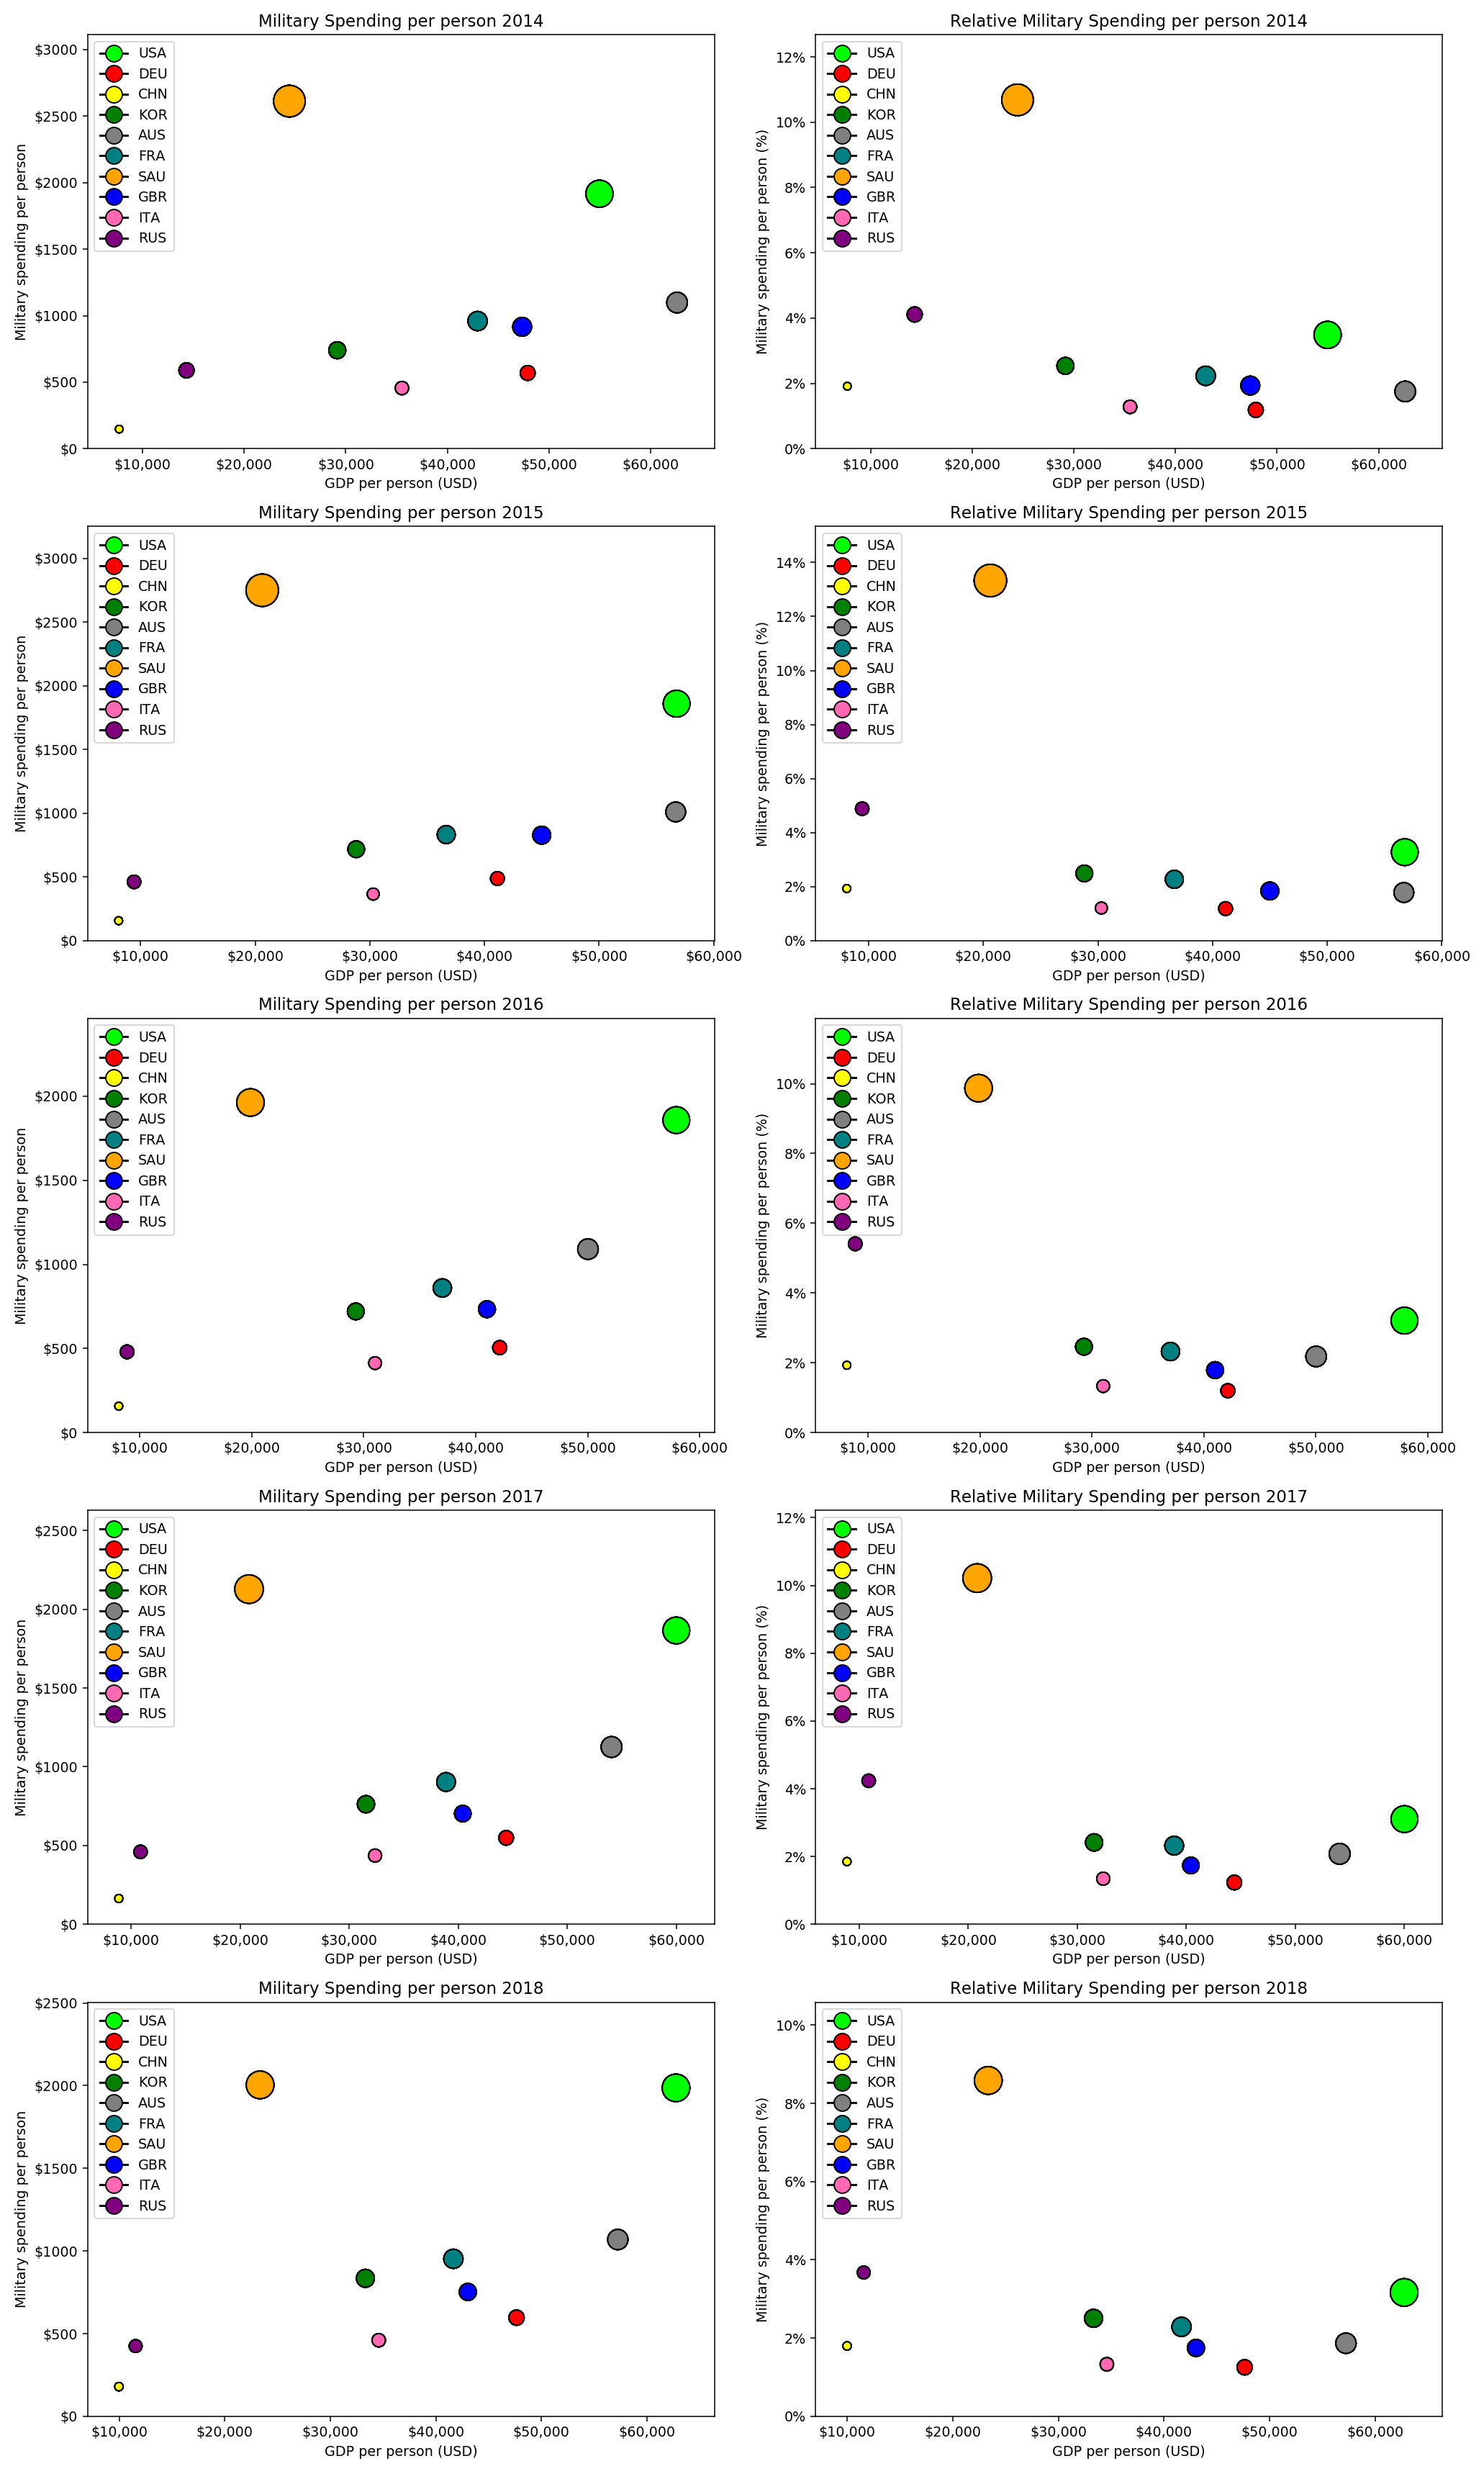

In [17]:
#Create subplots with 5 rows and 2 columns representing the absolute and relative military spending by year

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', markerfacecolor='lime', color='black', markersize=12, label='USA' ),
                   Line2D([0], [0], marker='o', markerfacecolor='red', color='black', markersize=12, label='DEU'),
                   Line2D([0], [0], marker='o', markerfacecolor='yellow', color='black',markersize=12, label='CHN'),
                   Line2D([0], [0], marker='o', markerfacecolor='green', color='black', markersize=12, label='KOR'),
                   Line2D([0], [0], marker='o', markerfacecolor='gray', color='black', markersize=12, label='AUS'),
                   Line2D([0], [0], marker='o', markerfacecolor='teal', color='black', markersize=12, label='FRA'),
                   Line2D([0], [0], marker='o', markerfacecolor='orange', color='black', markersize=12, label='SAU'),
                   Line2D([0], [0], marker='o', markerfacecolor='blue', color='black', markersize=12, label='GBR'),
                   Line2D([0], [0], marker='o', markerfacecolor='hotpink',color='black', markersize=12, label='ITA'),
                   Line2D([0], [0], marker='o', markerfacecolor='purple', color='black', markersize=12, label='RUS')]

figure, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,25))

#Loop through the years and give me population, military spending and gdp 
for i in range(5):
    yr = i + 2014
    military = str(yr) + "_mil"
    gdp = str(yr) + "_gdp"
    pop = str(yr) + "_pop"
    
    #Calculate military spending per person in absolute and percentage 
    plots_df = data[['Country Code','Country Name','Colors', military, gdp, pop]]
    plots_df['mil_pp'] = plots_df[military] / plots_df[pop]
    plots_df['gdp_pp'] = plots_df[gdp] / plots_df[pop]
    plots_df['mil_pp(%)'] = (plots_df['mil_pp'] / plots_df['gdp_pp']) * 100
    
    for index, row in plots_df.iterrows():

        size = plots_df['mil_pp'] / 5
        color= plots_df['Colors']
       
  
        #Military per person vs gdp per person
        sct1= axes[i, 0].scatter('gdp_pp', 'mil_pp', data= plots_df, marker='o', c=color,\
        s=size, edgecolors='black')

        #Military per person (%) vs. gdp per person
        sct2 = axes[i, 1].scatter('gdp_pp', 'mil_pp(%)', data=plots_df, marker='o', c=color,\
        s=size, edgecolors='black')
        
    #Customize axes, labels and tick locations
    axes[i, 0].set_ylabel('Military spending per person')
    axes[i, 0].set_xlabel('GDP per person (USD)')
    axes[i, 0].set_title('Military Spending per person ' + str(yr) )
    axes[i, 0].set_ylim(0, plots_df['mil_pp'].max()+ 500)
    axes[i, 0].xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
    axes[i, 0].yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:.0f}"))
   
     #Customize axes, labels and tick locations
    axes[i, 1].set_ylabel('Military spending per person (%)')
    axes[i, 1].set_xlabel('GDP per person (USD)')
    axes[i, 1].set_title('Relative Military Spending per person ' + str(yr) )
    axes[i, 1].set_ylim(0, plots_df['mil_pp(%)'].max()+ 2)
    axes[i, 1].xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
    axes[i, 1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}%"))
    
    
    plt.subplots_adjust(bottom=0.2,  top=2.0, right= 2.0, wspace=0.3, hspace=0.6)
    axes[i,0].legend(handles=legend_elements, loc='upper left')
    axes[i,1].legend(handles=legend_elements, loc='upper left')
    
    plt.tight_layout()
    
 
    
    

In [18]:
#plt.savefig('./Images/Military_ppVsGDP_pp.jpg')
#plt.show()

# Fastest Growing Countries in military spending absolute and percentage

<IPython.core.display.Javascript object>


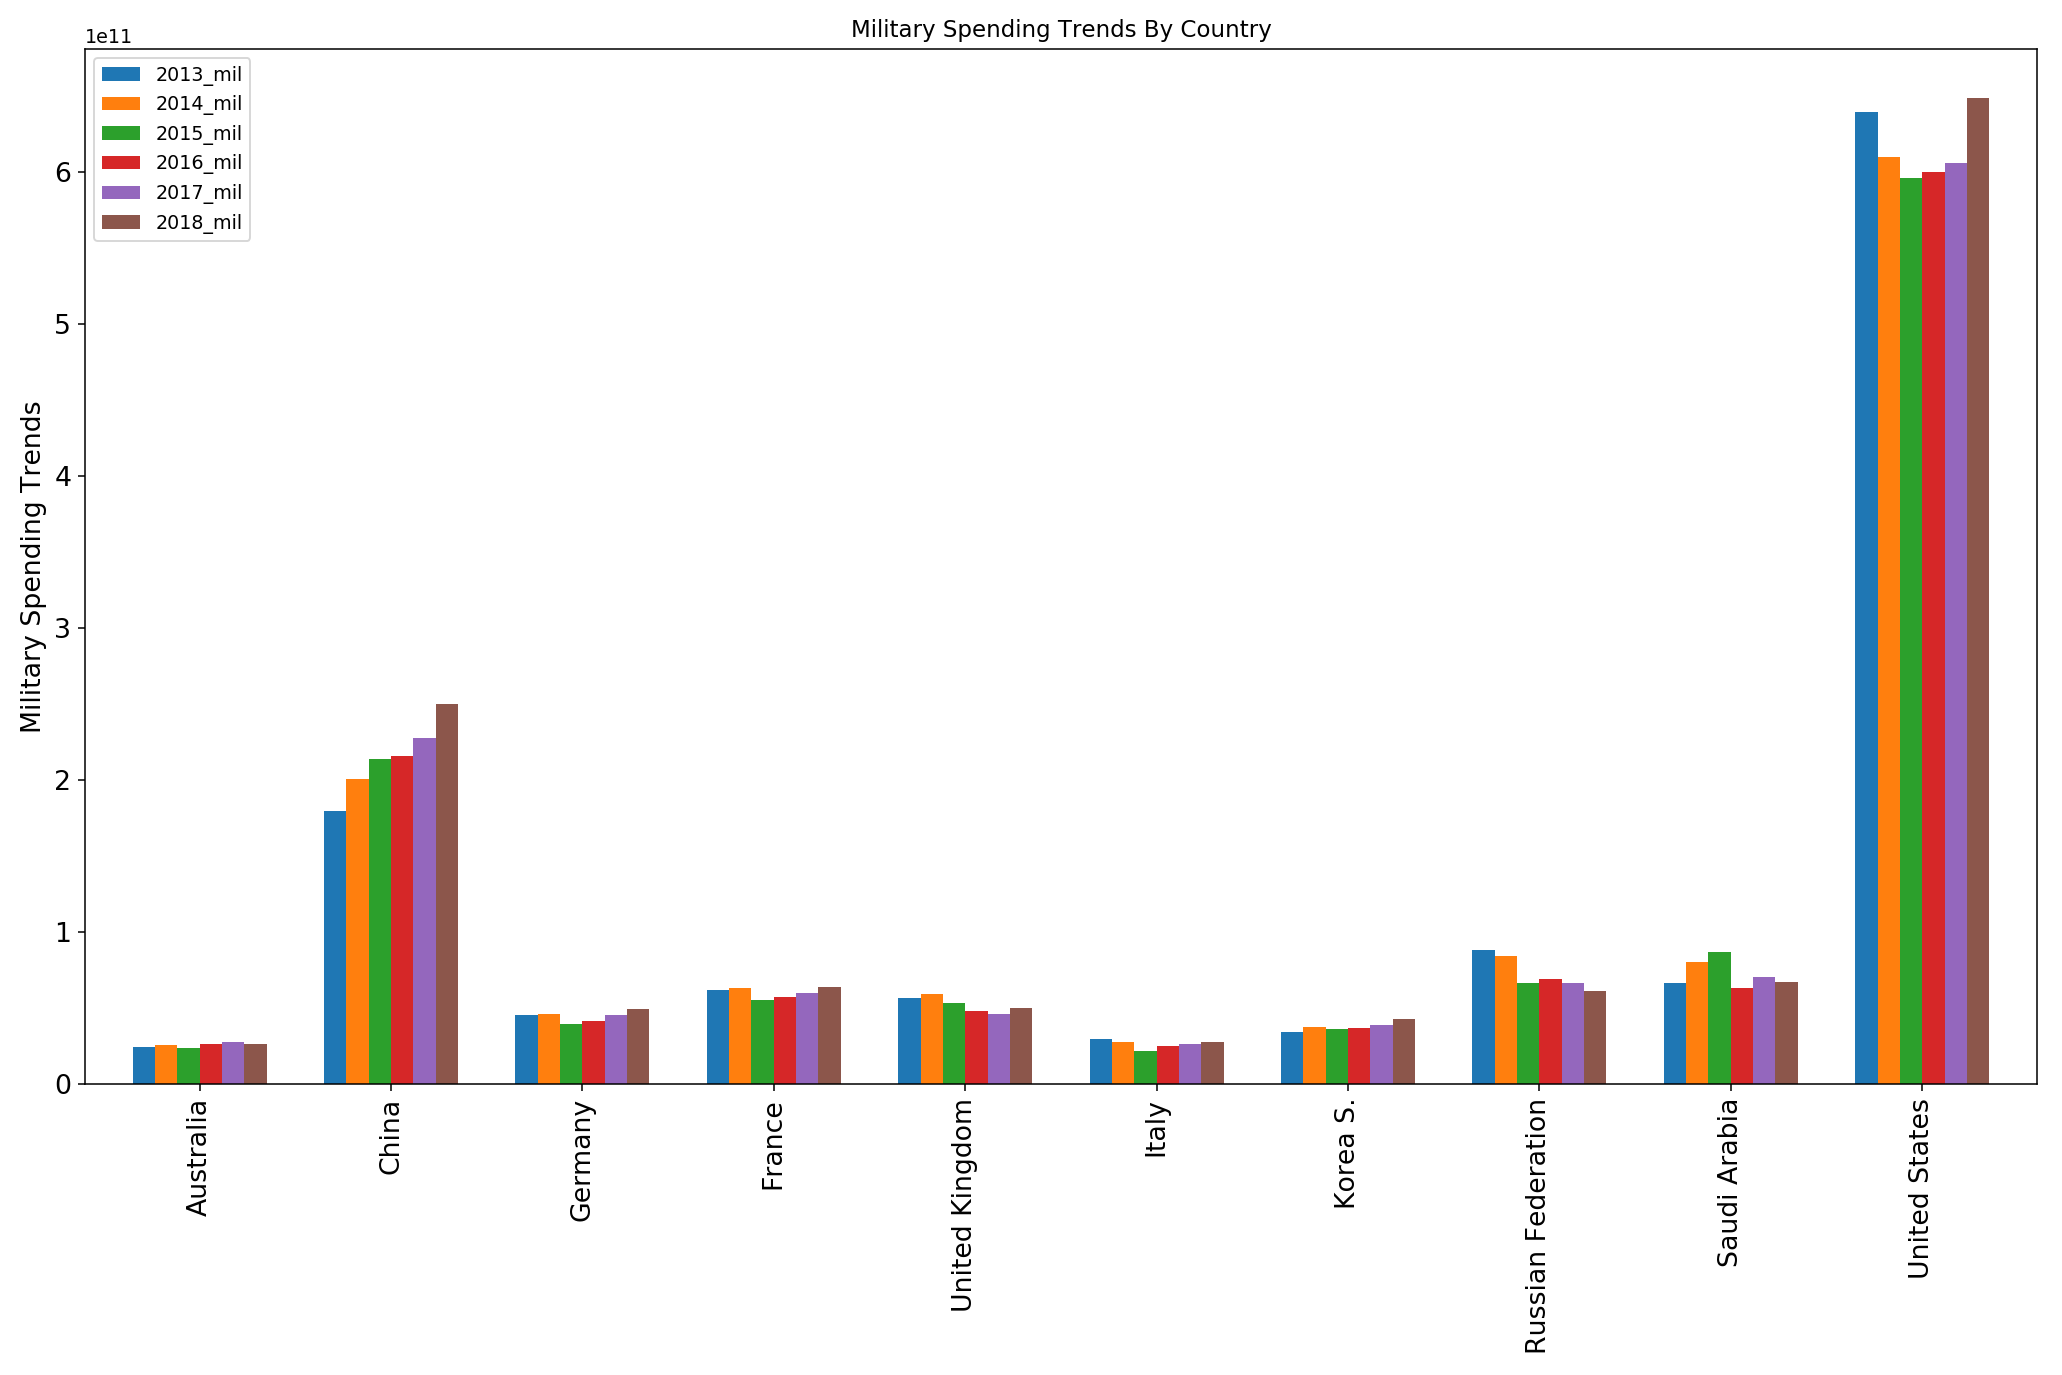

In [19]:
#Military Data
df = military_exp.iloc[0:10, :]

x_axis = np.arange(len(df))
tick_locations = x_axis
width = 0.7

ax = df.plot(kind='bar', width=width, figsize=(15,10), title='Military Spending Trends By Country', fontsize=14)
plt.xticks(tick_locations, df['Country Name'])
plt.ylabel('Military Spending Trends', fontsize=14)
plt.tight_layout()

In [20]:
#plt.savefig('./Images/MilitarySpendingTrends_pp.jpg')
#plt.show()

<IPython.core.display.Javascript object>


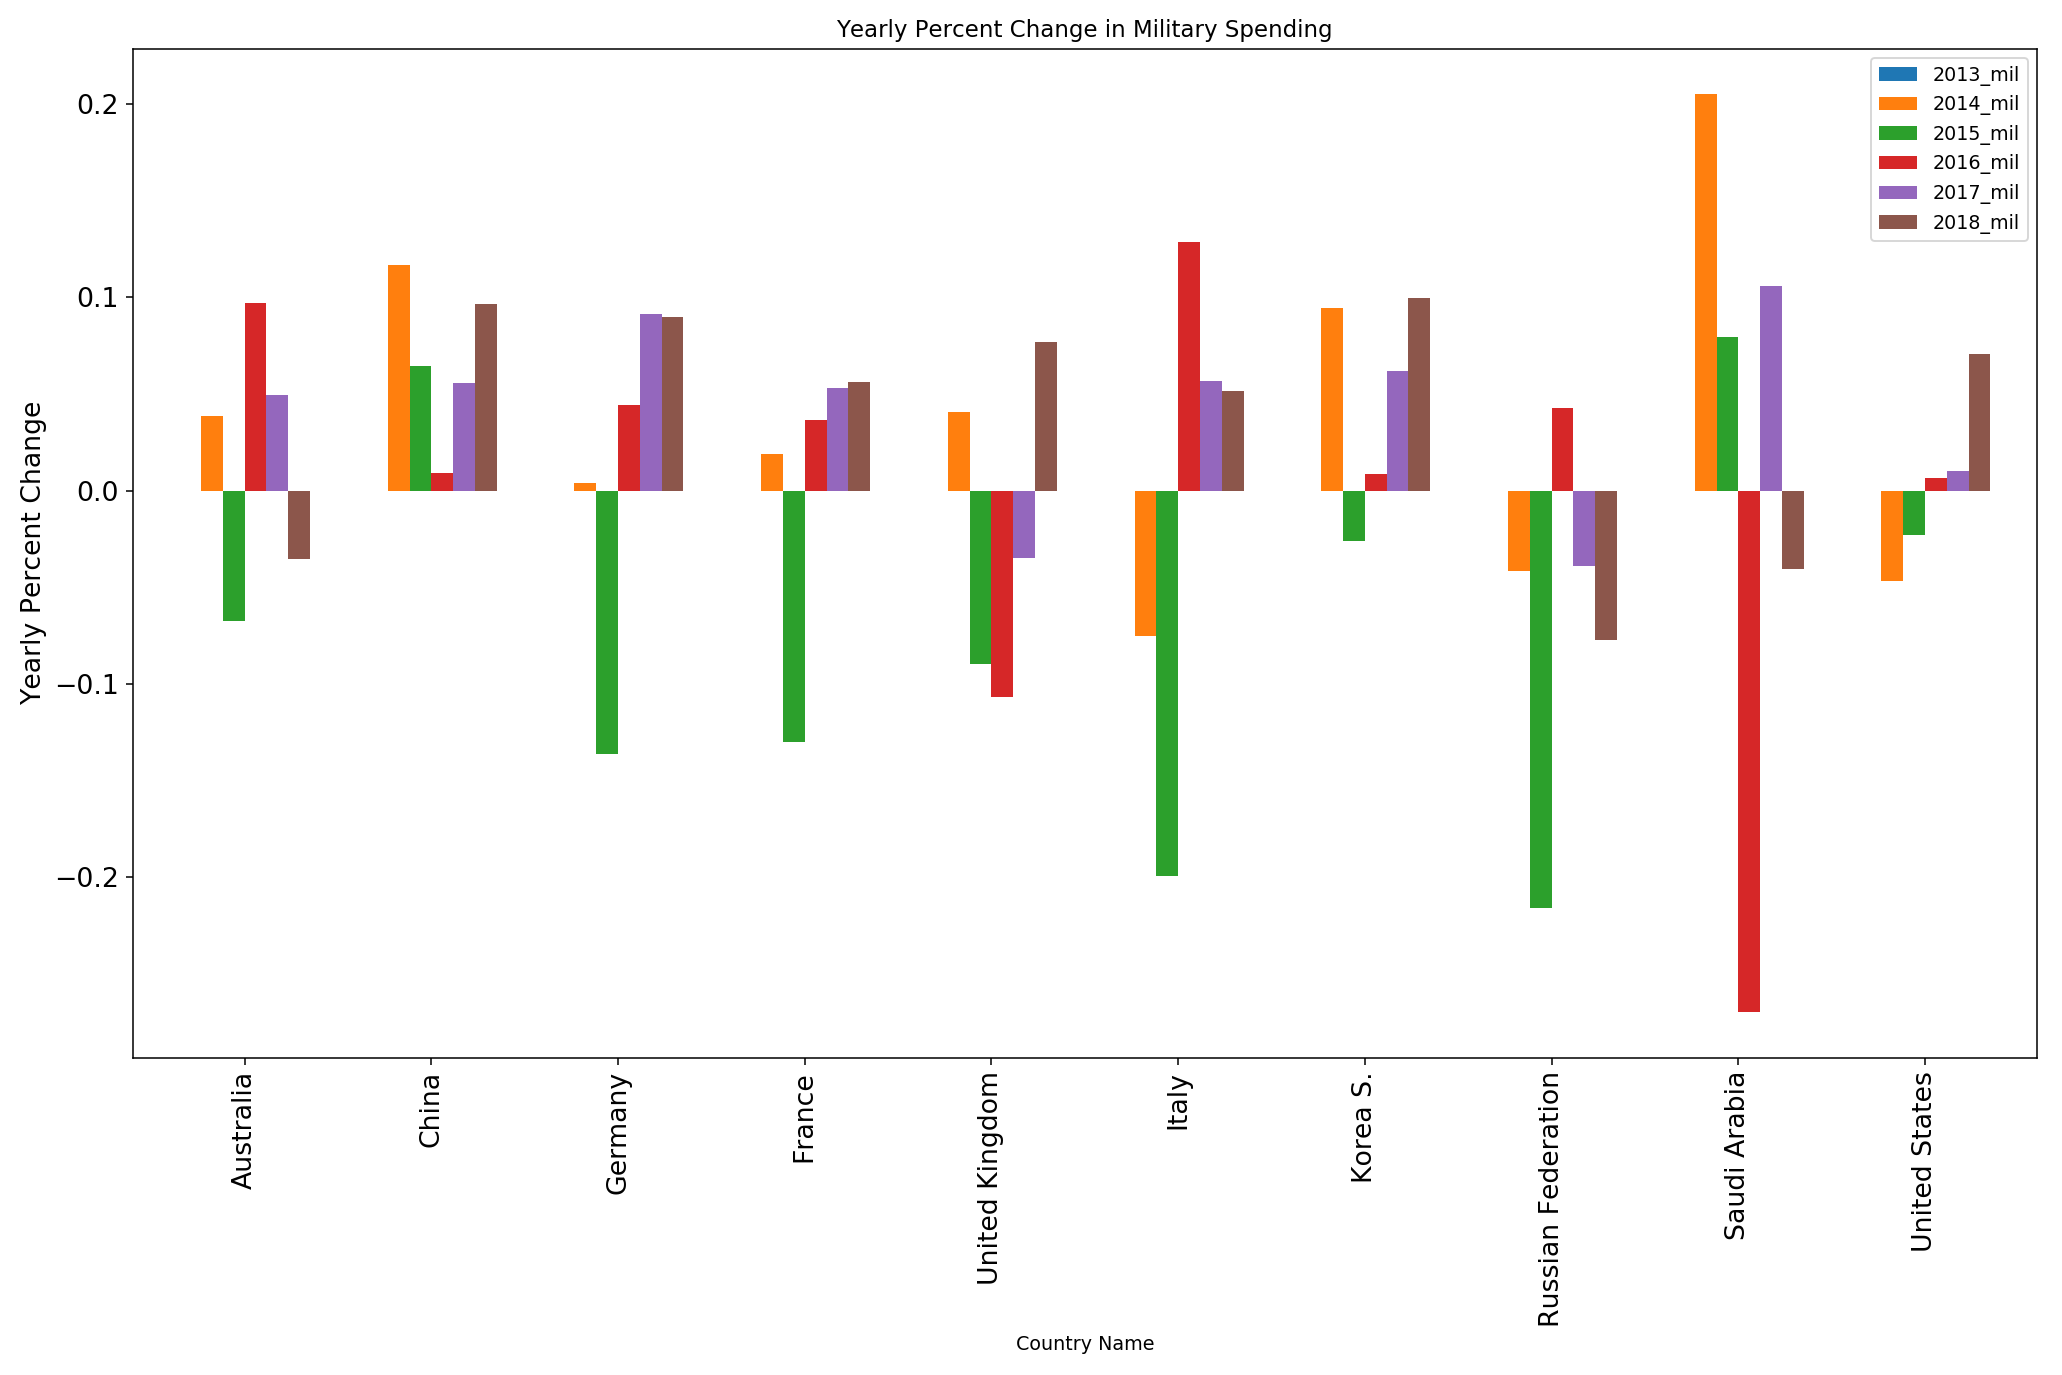

In [21]:
#Copy of df becuase they point to the same object in memory
df2 = df.copy()
del df2['Country Code']
countries = df2.set_index('Country Name')

# Calculate yearly percent changes in military spending using pandas .pct_change method
yearly_change = countries.pct_change(axis='columns')
yearly_change.fillna(0)

#Set xticks and size of each rect
x_axis = np.arange(len(countries))
tick_locations = x_axis
width = 0.7

# plot bar
ax = yearly_change.plot(kind='bar', width=width, figsize=(15,10), title='Yearly Percent Change in Military Spending', fontsize=14)
plt.xticks(tick_locations, df['Country Name'])
plt.ylabel('Yearly Percent Change', fontsize=14)
plt.tight_layout()


In [22]:
#plt.savefig('./Images/MilitarySpedningTrendsPercentage.jpg')
#plt.show()